## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.031200 -0.795507 -0.003658 -0.797936 -1.051797 -0.882386
1 -0.081114  0.632485  0.853908  0.400307  1.410320  1.064356
2 -1.495118 -1.418808 -1.224123 -1.651995 -1.309652 -2.075015
3 -1.459460  0.220651 -0.977123 -0.842320  1.299608 -0.831805
4  0.519497 -0.648208 -0.094163  0.621553  0.742181  0.488864


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0066314	total: 60ms	remaining: 59.9s
1:	learn: 0.9970385	total: 60.7ms	remaining: 30.3s
2:	learn: 0.9853426	total: 61.2ms	remaining: 20.3s
3:	learn: 0.9741382	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9644556	total: 62.2ms	remaining: 12.4s
5:	learn: 0.9552842	total: 62.6ms	remaining: 10.4s
6:	learn: 0.9444192	total: 63.1ms	remaining: 8.96s
7:	learn: 0.9332525	total: 63.7ms	remaining: 7.9s
8:	learn: 0.9222370	total: 64.2ms	remaining: 7.07s
9:	learn: 0.9127697	total: 64.7ms	remaining: 6.4s
10:	learn: 0.9013906	total: 65.1ms	remaining: 5.86s
11:	learn: 0.8918534	total: 65.6ms	remaining: 5.4s
12:	learn: 0.8817693	total: 66.1ms	remaining: 5.02s
13:	learn: 0.8724290	total: 66.7ms	remaining: 4.69s
14:	learn: 0.8651684	total: 67.1ms	remaining: 4.41s
15:	learn: 0.8566355	total: 67.6ms	remaining: 4.15s
16:	learn: 0.8461068	total: 68ms	remaining: 3.93s
17:	learn: 0.8368181	total: 68.4ms	remaining: 3.73s
18:	learn: 0.8288972	total: 69ms	remaining: 3.56s
1

104:	learn: 0.3889905	total: 108ms	remaining: 919ms
105:	learn: 0.3860646	total: 108ms	remaining: 915ms
106:	learn: 0.3828483	total: 110ms	remaining: 914ms
107:	learn: 0.3801849	total: 110ms	remaining: 909ms
108:	learn: 0.3771960	total: 110ms	remaining: 903ms
109:	learn: 0.3738841	total: 111ms	remaining: 898ms
110:	learn: 0.3708609	total: 111ms	remaining: 891ms
111:	learn: 0.3682794	total: 112ms	remaining: 887ms
112:	learn: 0.3649702	total: 112ms	remaining: 882ms
113:	learn: 0.3621096	total: 113ms	remaining: 877ms
114:	learn: 0.3593493	total: 113ms	remaining: 872ms
115:	learn: 0.3568131	total: 114ms	remaining: 868ms
116:	learn: 0.3547948	total: 119ms	remaining: 896ms
117:	learn: 0.3517711	total: 119ms	remaining: 891ms
118:	learn: 0.3491900	total: 120ms	remaining: 887ms
119:	learn: 0.3464713	total: 120ms	remaining: 881ms
120:	learn: 0.3438483	total: 121ms	remaining: 876ms
121:	learn: 0.3413938	total: 121ms	remaining: 871ms
122:	learn: 0.3389600	total: 122ms	remaining: 867ms
123:	learn: 

238:	learn: 0.1643050	total: 188ms	remaining: 600ms
239:	learn: 0.1633509	total: 189ms	remaining: 599ms
240:	learn: 0.1621730	total: 190ms	remaining: 597ms
241:	learn: 0.1612247	total: 190ms	remaining: 595ms
242:	learn: 0.1603110	total: 190ms	remaining: 593ms
243:	learn: 0.1593647	total: 191ms	remaining: 592ms
244:	learn: 0.1581090	total: 191ms	remaining: 589ms
245:	learn: 0.1568052	total: 192ms	remaining: 588ms
246:	learn: 0.1558919	total: 192ms	remaining: 586ms
247:	learn: 0.1551011	total: 193ms	remaining: 584ms
248:	learn: 0.1538894	total: 193ms	remaining: 582ms
249:	learn: 0.1530369	total: 194ms	remaining: 581ms
250:	learn: 0.1518349	total: 194ms	remaining: 579ms
251:	learn: 0.1508547	total: 195ms	remaining: 578ms
252:	learn: 0.1498030	total: 195ms	remaining: 576ms
253:	learn: 0.1487072	total: 196ms	remaining: 574ms
254:	learn: 0.1476567	total: 196ms	remaining: 572ms
255:	learn: 0.1467756	total: 197ms	remaining: 571ms
256:	learn: 0.1458948	total: 197ms	remaining: 570ms
257:	learn: 

465:	learn: 0.0476037	total: 293ms	remaining: 335ms
466:	learn: 0.0473896	total: 293ms	remaining: 335ms
467:	learn: 0.0471566	total: 294ms	remaining: 334ms
468:	learn: 0.0468743	total: 294ms	remaining: 333ms
469:	learn: 0.0466196	total: 295ms	remaining: 333ms
470:	learn: 0.0463941	total: 295ms	remaining: 332ms
471:	learn: 0.0461412	total: 296ms	remaining: 331ms
472:	learn: 0.0459882	total: 296ms	remaining: 330ms
473:	learn: 0.0457872	total: 297ms	remaining: 329ms
474:	learn: 0.0456378	total: 297ms	remaining: 328ms
475:	learn: 0.0454682	total: 297ms	remaining: 327ms
476:	learn: 0.0453226	total: 298ms	remaining: 327ms
477:	learn: 0.0450861	total: 298ms	remaining: 326ms
478:	learn: 0.0448549	total: 304ms	remaining: 331ms
479:	learn: 0.0446661	total: 305ms	remaining: 331ms
480:	learn: 0.0445053	total: 306ms	remaining: 330ms
481:	learn: 0.0443663	total: 306ms	remaining: 329ms
482:	learn: 0.0441412	total: 307ms	remaining: 328ms
483:	learn: 0.0440052	total: 307ms	remaining: 328ms
484:	learn: 

619:	learn: 0.0258840	total: 371ms	remaining: 228ms
620:	learn: 0.0258047	total: 372ms	remaining: 227ms
621:	learn: 0.0257289	total: 372ms	remaining: 226ms
622:	learn: 0.0255832	total: 373ms	remaining: 226ms
623:	learn: 0.0255019	total: 373ms	remaining: 225ms
624:	learn: 0.0254208	total: 374ms	remaining: 224ms
625:	learn: 0.0253439	total: 374ms	remaining: 224ms
626:	learn: 0.0252783	total: 375ms	remaining: 223ms
627:	learn: 0.0251648	total: 376ms	remaining: 223ms
628:	learn: 0.0251095	total: 376ms	remaining: 222ms
629:	learn: 0.0249216	total: 377ms	remaining: 221ms
630:	learn: 0.0248309	total: 377ms	remaining: 221ms
631:	learn: 0.0247532	total: 378ms	remaining: 220ms
632:	learn: 0.0246769	total: 378ms	remaining: 219ms
633:	learn: 0.0245684	total: 379ms	remaining: 219ms
634:	learn: 0.0243897	total: 379ms	remaining: 218ms
635:	learn: 0.0243151	total: 380ms	remaining: 217ms
636:	learn: 0.0242362	total: 380ms	remaining: 217ms
637:	learn: 0.0241594	total: 381ms	remaining: 216ms
638:	learn: 

834:	learn: 0.0145416	total: 476ms	remaining: 94.1ms
835:	learn: 0.0144572	total: 477ms	remaining: 93.5ms
836:	learn: 0.0144117	total: 477ms	remaining: 92.9ms
837:	learn: 0.0143224	total: 478ms	remaining: 92.3ms
838:	learn: 0.0142833	total: 478ms	remaining: 91.7ms
839:	learn: 0.0142237	total: 478ms	remaining: 91.1ms
840:	learn: 0.0141931	total: 479ms	remaining: 90.5ms
841:	learn: 0.0141782	total: 479ms	remaining: 89.9ms
842:	learn: 0.0141582	total: 480ms	remaining: 89.3ms
843:	learn: 0.0141280	total: 480ms	remaining: 88.7ms
844:	learn: 0.0141100	total: 480ms	remaining: 88.1ms
845:	learn: 0.0140834	total: 481ms	remaining: 87.5ms
846:	learn: 0.0140390	total: 481ms	remaining: 86.9ms
847:	learn: 0.0140214	total: 482ms	remaining: 86.3ms
848:	learn: 0.0140022	total: 482ms	remaining: 85.7ms
849:	learn: 0.0139753	total: 482ms	remaining: 85.1ms
850:	learn: 0.0139579	total: 483ms	remaining: 84.5ms
851:	learn: 0.0139409	total: 483ms	remaining: 83.9ms
852:	learn: 0.0138832	total: 483ms	remaining: 

996:	learn: 0.0089083	total: 554ms	remaining: 1.67ms
997:	learn: 0.0089046	total: 555ms	remaining: 1.11ms
998:	learn: 0.0088799	total: 556ms	remaining: 556us
999:	learn: 0.0088656	total: 556ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

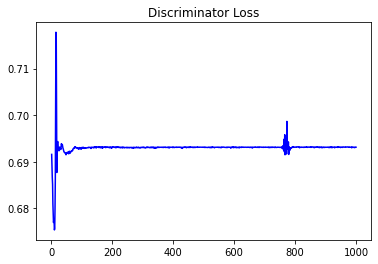

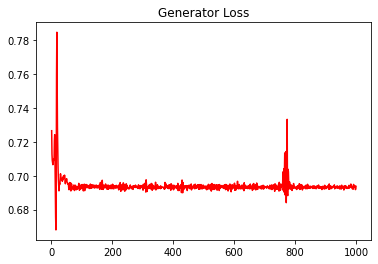

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.21701873763370313


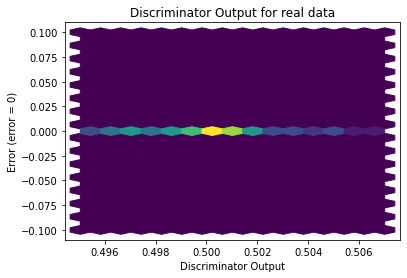

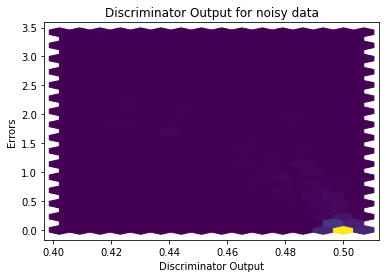

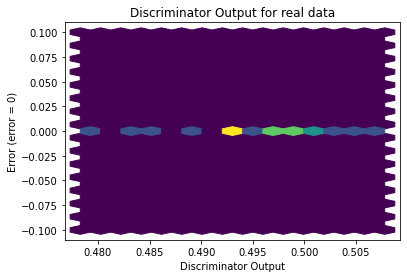

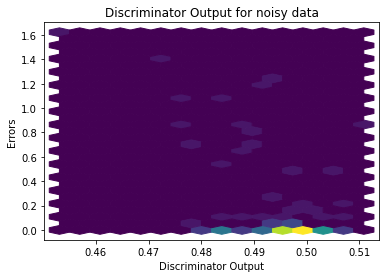

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


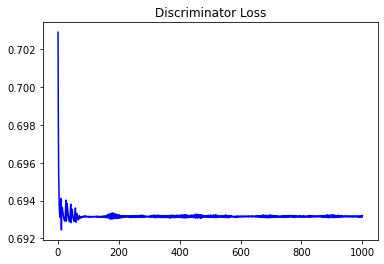

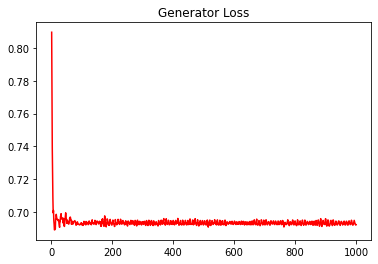

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2241003488904106


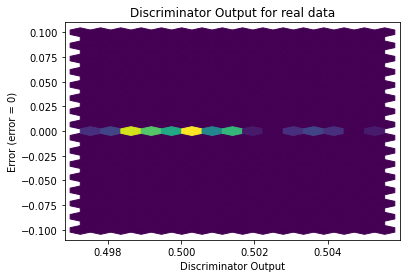

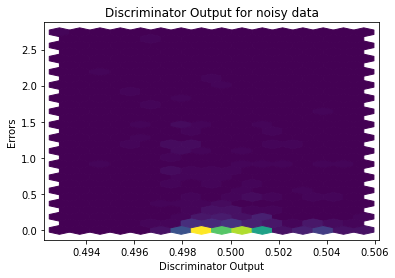

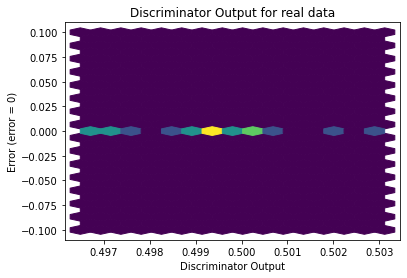

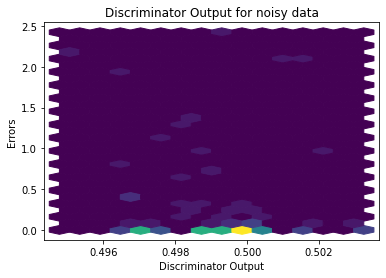

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0606]], requires_grad=True)
